### Matplotlib --> Matplotlib is a python library used to creating static, animated, and interactive visualizations.
* Data representation in the form of graphics is called visualization
* Matplotlib ---> linear algebra + math + Graphic

# Business Use Case
* Title: Interactive Sales and profit Monitoring Dashboard for small Reatail Businesses
## Objective:
* To provide business owners and analysts with a lightweight, web-based visualization tool to monitor and interpret monthly sales and profit trends, identify performance patterns, and support better decision-making without requiring advanced BI platforms.

# Stakeholders:
* Small retail business owners
* Sales managers
* Financial analysts
* Marketing teams

# Key Features:
* Interactive charts (line, bar, pie, scatter, histogram, box plot) to analyze sales and profit trends
* Easy toggle between different ciews using a simple webinterface
* No complex installation - run as lightweight Gradio App
* Rapid insights without needing Excel or Power BI

In [2]:
!pip install pandas

In [1]:
import pandas as pd

data = {
    "Month": ['Jan','Feb','Mar','Apr','May','June'],
    "Sales": [10000, 12000, 15000, 13000, 17000, 16000],
    "Profit": [2000, 3000, 4000, 2500, 3500, 3000]
}

df = pd.DataFrame(data)
print(df)

  Month  Sales  Profit
0   Jan  10000    2000
1   Feb  12000    3000
2   Mar  15000    4000
3   Apr  13000    2500
4   May  17000    3500
5  June  16000    3000


# 1. Line style Monthly Sales

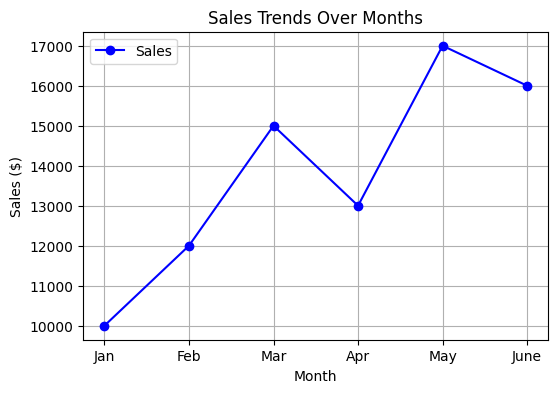

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(df['Month'],df['Sales'],color = 'blue',marker = 'o',linestyle = '-',label = 'Sales')
plt.title('Sales Trends Over Months')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.legend()
plt.show()

# 2. Barplot Month vs Profit

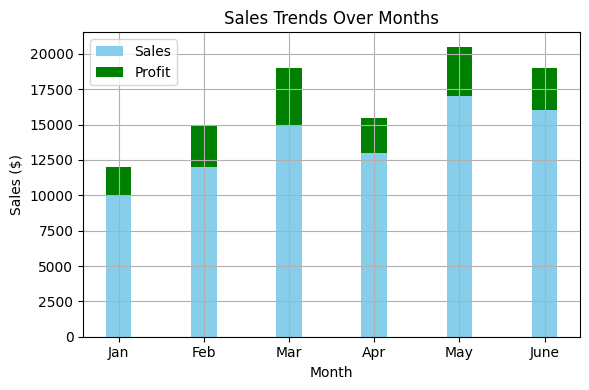

In [3]:
plt.figure(figsize=(6,4))
width = 0.3
plt.bar(df['Month'],df['Sales'],width = width,color = 'skyblue',label = 'Sales')
plt.bar(df['Month'],df['Profit'],width = width,color = 'green',label = 'Profit',bottom = df['Sales'])
plt.title('Sales Trends Over Months')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 3. Pie chart Profit vs Month

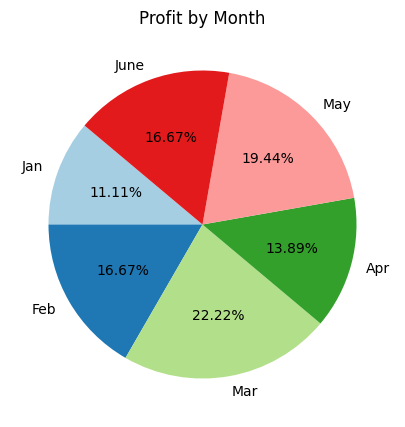

In [4]:
plt.figure(figsize=(8,5))
plt.pie(df['Profit'],labels=df['Month'],autopct='%1.2f%%',startangle=140,colors = plt.cm.Paired.colors)
plt.title('Profit by Month')
plt.show()

# 4. Scatter Plot

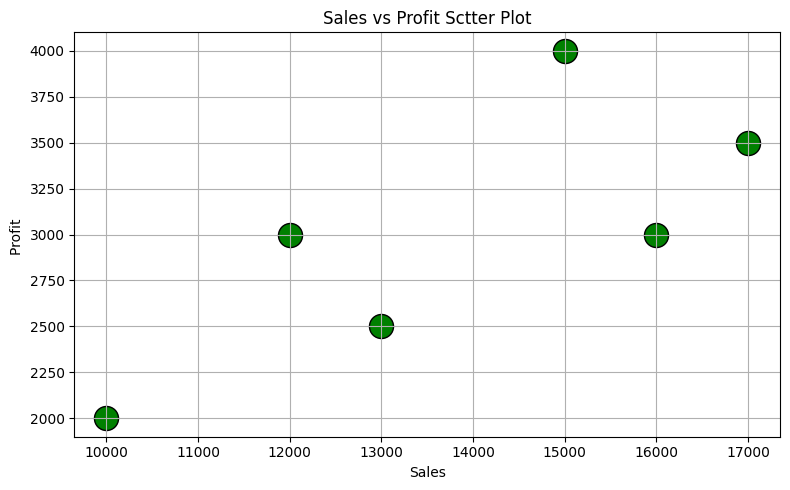

In [5]:
plt.figure(figsize = (8,5))
plt.scatter(df['Sales'],df['Profit'],color = 'green',s = 300,edgecolors='black')
plt.title('Sales vs Profit Sctter Plot')
plt.xlabel('Sales')
plt.ylabel('Profit ')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Histogram 

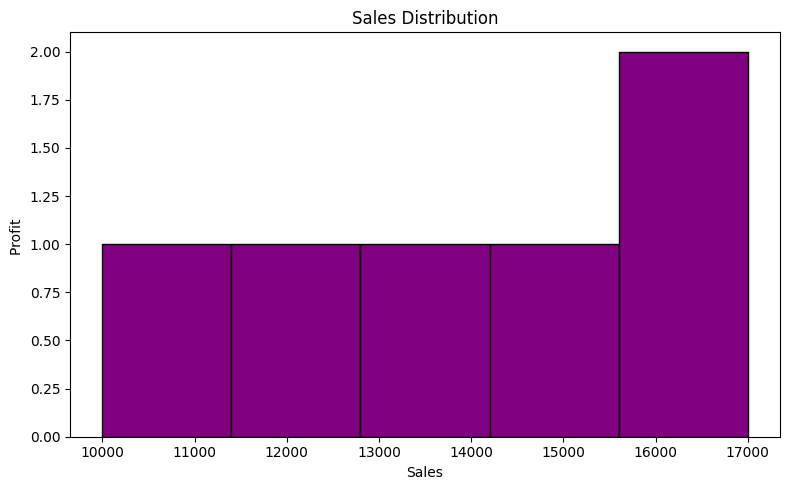

In [6]:
plt.figure(figsize = (8,5))
plt.hist(df['Sales'],bins = 5,color = 'purple',edgecolor = 'black')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Profit ')
plt.tight_layout()
plt.show()

# 6. Box Plot

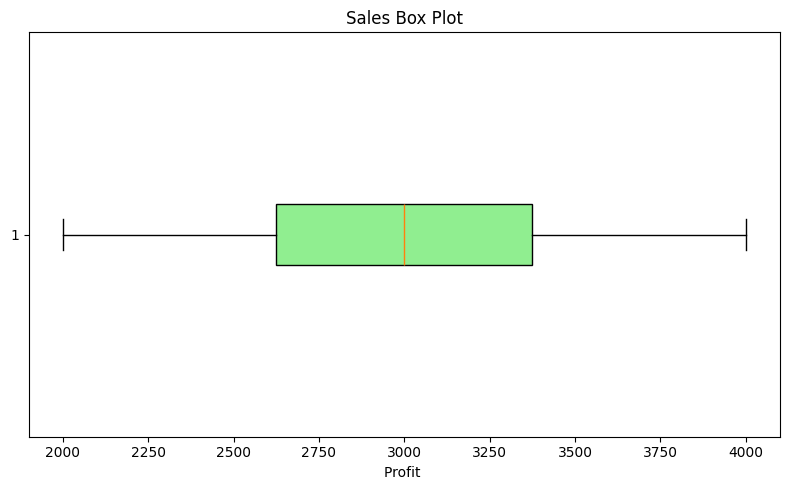

In [7]:
plt.figure(figsize = (8,5))
plt.boxplot(df['Profit'],vert = False,patch_artist=True,boxprops=dict(facecolor = 'lightgreen'))
plt.title('Sales Box Plot')
plt.xlabel('Profit ')
plt.tight_layout()
plt.show()

In [8]:
!pip install gradio

  Using cached gradio-5.29.1-py3-none-any.whl.metadata (16 kB)
  Using cached aiofiles-24.1.0-py3-none-any.whl.metadata (10 kB)
  Using cached fastapi-0.115.12-py3-none-any.whl.metadata (27 kB)
  Using cached ffmpy-0.5.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached gradio_client-1.10.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached groovy-0.1.2-py3-none-any.whl.metadata (6.1 kB)
  Using cached huggingface_hub-0.31.4-py3-none-any.whl.metadata (13 kB)
  Using cached orjson-3.10.18-cp312-cp312-win_amd64.whl.metadata (43 kB)
  Using cached pydub-0.25.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached python_multipart-0.0.20-py3-none-any.whl.metadata (1.8 kB)
  Using cached ruff-0.11.10-py3-none-win_amd64.whl.metadata (26 kB)
  Using cached safehttpx-0.1.6-py3-none-any.whl.metadata (4.2 kB)
  Using cached semantic_version-2.10.0-py2.py3-none-any.whl.metadata (9.7 kB)
  Using cached starlette-0.46.2-py3-none-any.whl.metadata (6.2 kB)
  Using cached tomlkit-0.13.2-py3-none-any.wh

In [3]:
import gradio as gr
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "Month": ['Jan','Feb','Mar','Apr','May','June'],
    "Sales": [10000, 12000, 15000, 13000, 17000, 16000],
    "Profit": [2000, 3000, 4000, 2500, 3500, 3000]
}

df = pd.DataFrame(data)

def generate_plot(plot_type):
    fig = plt.figure(figsize = (8,5))

    if plot_type == 'Line Plot':
        plt.plot(df['Month'],df['Sales'],color = 'blue',marker = 'o',linestyle = '-',label = 'Sales')
        plt.title('Sales Trends Over Months')
        plt.xlabel('Month')
        plt.ylabel('Sales ($)')
        plt.grid(True)
        plt.legend()

    elif plot_type == 'Stacked bar chart':
        fig.set_size_inches(10,6)
        width = 0.3
        plt.bar(df['Month'],df['Sales'],width = width,color = 'skyblue',label = 'Sales')
        plt.bar(df['Month'],df['Profit'],width = width,color = 'green',label = 'Profit',bottom = df['Sales'])
        plt.title('Sales Trends Over Months')
        plt.xlabel('Month')
        plt.ylabel('Sales ($)')
        plt.grid(True)
        plt.legend()

    elif plot_type == 'Pie Chart':
        fig.set_size_inches(8,8)
        plt.pie(df['Profit'],labels=df['Month'],autopct='%1.2f%%',startangle=140,colors = plt.cm.Paired.colors)
        plt.title('Profit by Month')

    elif plot_type == 'Scatter Plot':
        plt.scatter(df['Sales'],df['Profit'],color = 'green',s = 100,edgecolors='black')
        plt.title('Sales vs Profit Sctter Plot')
        plt.xlabel('Sales')
        plt.ylabel('Profit ')
        plt.grid(True)

    elif plot_type == 'Histogram Plot':
        plt.hist(df['Sales'],bins = 5,color = 'purple',edgecolor = 'black')
        plt.title('Sales Distribution')
        plt.xlabel('Sales')
        plt.ylabel('Frequency ')

    elif plot_type == 'Box Plot':
        plt.boxplot(df['Profit'],vert = False,patch_artist=True,boxprops=dict(facecolor = 'lightgreen'))
        plt.title('Sales Box Plot')
        plt.xlabel('Profit ')

    plt.tight_layout()
    return fig

# Gradio ui report

demo = gr.Interface(
    fn = generate_plot,
    inputs = gr.Radio(['Line Plot', 'Stacked bar chart','Pie Chart','Scatter Plot', 'Histogram Plot', 'Box Plot'], label = "Choose plot type"),
    outputs = gr.Plot(label = "Sales Data Visualization"),
    title = 'Sales & Profit visual insght',
    description = "Choose the type to visualize the data"
)
demo.launch()

    
        

* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.


In [1]:
from tqdm.notebook import tqdm
import time

for i in tqdm(range(10)):
    time.sleep(0.1)

  0%|          | 0/10 [00:00<?, ?it/s]